<a href="https://colab.research.google.com/github/raushan9jnv/Best-Add-Predictor-Reinforcement-learning-InternshipProject/blob/main/Best_Ads_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import dataset
dataset = pd.read_csv("/content/Ads_CTR_Optimisation.csv")

In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:
#implement UCB
import math

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sum_of_rewards = [0]*d
total_reward = 0

for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if(numbers_of_selections[i] > 0):
      average_reward = sum_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/ numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n,ad]
  sum_of_rewards[ad] += reward
  total_reward += reward


Text(0, 0.5, 'No of times each ad was selected')

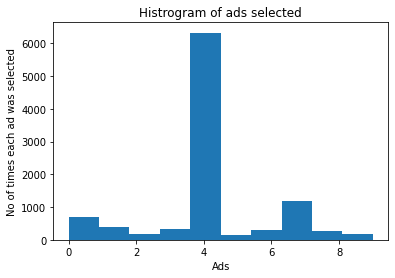

In [12]:
#visualize the results
plt.hist(ads_selected)
plt.title("Histrogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("No of times each ad was selected")

# Thompson Sampling

In [13]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

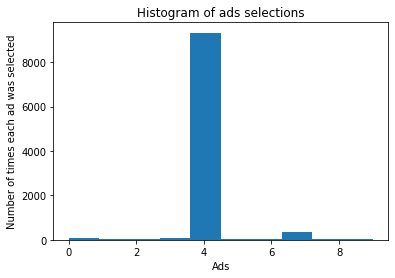

In [14]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()